In [11]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing


In [12]:
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = '4OTsOJiu1cERVuuqOAvg9LWbi'
CONSUMER_SECRET = 'EDs9p10sLdpDSRpvJCFaoHcyAHEL0tNjNszfTyJT1EW4eOQrUv'

# Access:
ACCESS_TOKEN  = '781242136989667328-aGIQ2JePB0zH2ihHgXGBWDUveVTag0W'
ACCESS_SECRET = 'jJGPzyFryGTDrMyfxSnCRBsfgJvv64pkQCG1R5LwjZTay'

In [14]:
# We import our access keys:
# from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [15]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

....cameras running. Another False Accusation. Why doesn’t @washingtonpost report the story of the women taking mon… https://t.co/OTpK1KLYOL

A woman I don’t know and, to the best of my knowledge, never met, is on the FRONT PAGE of the Fake News Washington… https://t.co/lWlDMu6gxb

I have been much tougher on Russia than Obama, just look at the facts. Total Fake News!

Hope Republicans in the Great State of Pennsylvania challenge the new “pushed” Congressional Map, all the way to th… https://t.co/bT190oQKpM

Matt Schlapp and CPAC are getting ready for another exciting event. Big difference from those days when President O… https://t.co/KxKVJL0Bc4



In [16]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,....cameras running. Another False Accusation....
1,"A woman I don’t know and, to the best of my kn..."
2,"I have been much tougher on Russia than Obama,..."
3,Hope Republicans in the Great State of Pennsyl...
4,Matt Schlapp and CPAC are getting ready for an...
5,"Republicans are now leading the Generic Poll, ..."
6,....The President Obama quote just before elec...
7,“There is no serious person out there who woul...
8,Thank you to @foxandfriends for the great time...
9,"“The Faith of Donald Trump,” a book just out b..."


In [17]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [18]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

965971586913374208
2018-02-20 15:29:07
Twitter for iPhone
26244
7097
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'washingtonpost', 'name': 'Washington Post', 'id': 2467791, 'id_str': '2467791', 'indices': [59, 74]}], 'urls': [{'url': 'https://t.co/OTpK1KLYOL', 'expanded_url': 'https://twitter.com/i/web/status/965971586913374208', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}


In [19]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [20]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,....cameras running. Another False Accusation....,140,965971586913374208,2018-02-20 15:29:07,Twitter for iPhone,26244,7097
1,"A woman I don’t know and, to the best of my kn...",139,965968309358333952,2018-02-20 15:16:06,Twitter for iPhone,33462,8368
2,"I have been much tougher on Russia than Obama,...",87,965943827931549696,2018-02-20 13:38:49,Twitter for iPhone,38982,8747
3,Hope Republicans in the Great State of Pennsyl...,140,965937068907073536,2018-02-20 13:11:58,Twitter for iPhone,40096,11188
4,Matt Schlapp and CPAC are getting ready for an...,140,965935035328155649,2018-02-20 13:03:53,Twitter for iPhone,28125,6026
5,"Republicans are now leading the Generic Poll, ...",140,965932714141650946,2018-02-20 12:54:39,Twitter for iPhone,43166,9920
6,....The President Obama quote just before elec...,139,965930611272712192,2018-02-20 12:46:18,Twitter for iPhone,45293,11746
7,“There is no serious person out there who woul...,140,965928352614965248,2018-02-20 12:37:20,Twitter for iPhone,36784,10129
8,Thank you to @foxandfriends for the great time...,140,965925223949357056,2018-02-20 12:24:54,Twitter for iPhone,39398,9234
9,"“The Faith of Donald Trump,” a book just out b...",110,965780052167286784,2018-02-20 02:48:02,Twitter for iPhone,52558,10766


In [21]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 129.98


In [22]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Somebody please inform Jay-Z that because of my policies, Black Unemployment has just been reported to be at the LOWEST RATE EVER RECORDED!
Number of likes: 240437
139 characters.

The tweet with more retweets is: 
Somebody please inform Jay-Z that because of my policies, Black Unemployment has just been reported to be at the LOWEST RATE EVER RECORDED!
Number of retweets: 64101
139 characters.



In [23]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

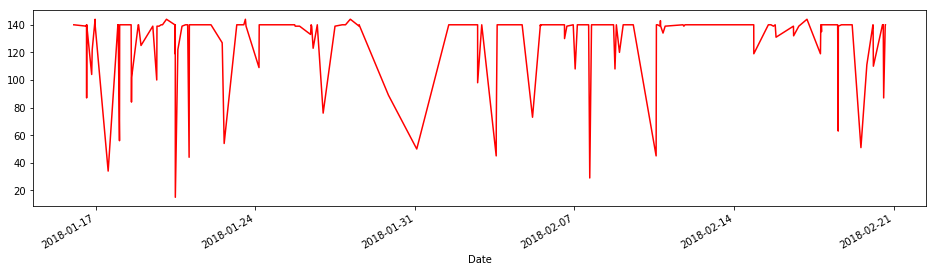

In [24]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

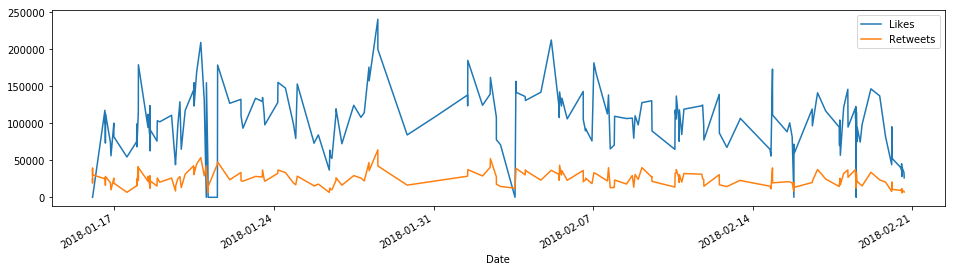

In [25]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [26]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter for iPad
* Media Studio


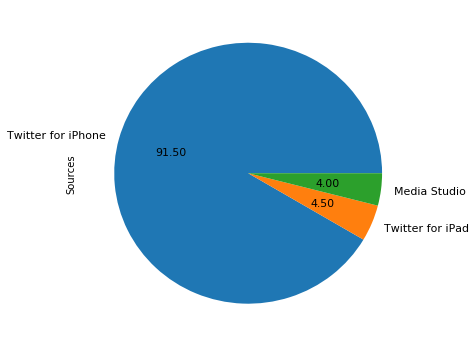

In [27]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [28]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [29]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,....cameras running. Another False Accusation....,140,965971586913374208,2018-02-20 15:29:07,Twitter for iPhone,26244,7097,-1
1,"A woman I don’t know and, to the best of my kn...",139,965968309358333952,2018-02-20 15:16:06,Twitter for iPhone,33462,8368,1
2,"I have been much tougher on Russia than Obama,...",87,965943827931549696,2018-02-20 13:38:49,Twitter for iPhone,38982,8747,-1
3,Hope Republicans in the Great State of Pennsyl...,140,965937068907073536,2018-02-20 13:11:58,Twitter for iPhone,40096,11188,1
4,Matt Schlapp and CPAC are getting ready for an...,140,965935035328155649,2018-02-20 13:03:53,Twitter for iPhone,28125,6026,1
5,"Republicans are now leading the Generic Poll, ...",140,965932714141650946,2018-02-20 12:54:39,Twitter for iPhone,43166,9920,1
6,....The President Obama quote just before elec...,139,965930611272712192,2018-02-20 12:46:18,Twitter for iPhone,45293,11746,1
7,“There is no serious person out there who woul...,140,965928352614965248,2018-02-20 12:37:20,Twitter for iPhone,36784,10129,1
8,Thank you to @foxandfriends for the great time...,140,965925223949357056,2018-02-20 12:24:54,Twitter for iPhone,39398,9234,1
9,"“The Faith of Donald Trump,” a book just out b...",110,965780052167286784,2018-02-20 02:48:02,Twitter for iPhone,52558,10766,1


In [30]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [31]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 53.5%
Percentage of neutral tweets: 23.0%
Percentage de negative tweets: 23.5%
